# EDA on snapdeal scrapped mobile phones data

In [38]:
#import libary for use method
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [39]:
#load dataset
df = pd.read_csv('snapdeal_csv.csv')
# df.drop('Unnamed: 0',axis='columns', inplace=True)
df

,Prod Name,Color,Rating,Price,RAM,Screen,Rear Camera,Front Camera,Memory,Battery,Processor
0,"Redmi 9 Prime ( 64GB , 4 GB )",Blue,4.5,10799,4 GB,16.51 cm (6.5),13MP+8MP+2MP,8 MP,64GB,5020,Octa
1,"itel A25 pro ( 32GB , 2 GB )",Purple,4.0,5599,2 GB,12.7 cm (5),5 MP,2 MP,32GB,3020,Quad
2,"Redmi Note 9 ( 128GB , 4 GB )",Green,4.0,14499,4 GB,16.51 cm (6.5),48 MP,13 MP,128GB,5020,Octa
3,"Blackberry ( 16GB , 2 GB )",Black,3.4,6999,2GB,12.7 cm (5),8 MP,2MP to 4.9MP,16GB,2800,Dual
4,"Redmi Note 9 ( 64GB , 4 GB )",Grey,4.4,13999,4 GB,16.51 cm (6.5),48MP+8MP+2MP+2MP,13 MP,64GB,5020 mAh,Octa
...,...,...,...,...,...,...,...,...,...,...,...
154,"Oppo A5 2020 ( 64GB , 4 GB )",Black,4.0,13990,4 GB,16.51 cm (6.5),12 MP,8 MP,64GB,5000 mAH Lithium Polymer,Octa
155,"Micromax Yu Yutopia 5050 ( 32GB , 4 GB )",Graphite,2.3,7099,4 GB,13.208 cm (5.2),21 MP,8 MP,32GB,3000,Octa
156,"Oppo F17 ( 128GB , 6 GB )",Blue,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015 mAh,Quad
157,"Oppo F17 ( 128GB , 6 GB )",Silver,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015 mAh,Quad


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Prod Name     159 non-null    object
 1   Color         159 non-null    object
 2   Rating        159 non-null    object
 3   Price         159 non-null    object
 4   RAM           159 non-null    object
 5   Screen        159 non-null    object
 6   Rear Camera   159 non-null    object
 7   Front Camera  159 non-null    object
 8   Memory        159 non-null    object
 9   Battery       159 non-null    object
 10  Processor     159 non-null    object
dtypes: object(11)
memory usage: 13.8+ KB


In [ ]:
#check null values

In [41]:
df.isnull().sum()

Prod Name       0
Color           0
Rating          0
Price           0
RAM             0
Screen          0
Rear Camera     0
Front Camera    0
Memory          0
Battery         0
Processor       0
dtype: int64

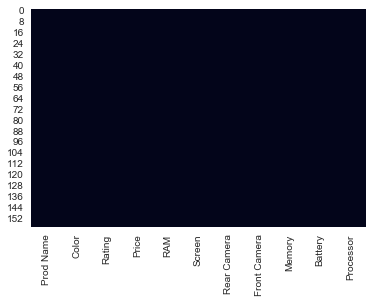

In [42]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

In [ ]:
# check duplicte values

In [43]:
df.duplicated().sum()

0

In [44]:
df_dup=df[df.duplicated()]
df_dup


,Prod Name,Color,Rating,Price,RAM,Screen,Rear Camera,Front Camera,Memory,Battery,Processor


In [45]:
df.shape

(159, 11)

In [46]:
df=df.drop_duplicates() 

In [47]:
df.shape

(159, 11)

In [48]:
df.duplicated().sum()

0

In [49]:
#frequency of object features
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Redmi Note 9 Pro ( 64GB , 4 GB )                4
Redmi Note 9 Pro ( 128GB , 4 GB )               3
Redmi Note 9 ( 64GB , 4 GB )                    3
INFINIX Hot 9 Pro ( 64GB , 4 GB )               3
Redmi 8A Dual ( 32GB , 2 GB )                   3
                                               ..
Micromax Yu Yutopia 5050 ( 32GB , 4 GB )        1
Realme C3 ( 64GB , 4 GB )                       1
Realme 7 ( 64GB , 6 GB )                        1
Coolpad Cool 5 ( 64GB , 4 GB )                  1
Micromax Canvas Infinity HS2 ( 32GB , 3 GB )    1
Name: Prod Name, Length: 109, dtype: int64

Black        51
Blue         39
White        19
Green        14
Gold          7
Grey          7
Red           6
Purple        5
Champagne     4
Orange        2
Silver        2
Graphite      1
Flare         1
Ninja         1
Name: Color, dtype: int64

Currently Unavailable    38
5.0                      16
4.0                      15
4.4                       8
3.7                       7
2.0            

In [50]:
df["RAM"].replace("2GB","2 GB",inplace=True)

In [51]:
df["Battery"].replace("Non-removable Li-Ion 2650 mAh battery","2650",inplace=True)

In [52]:
df.replace({'Rear Camera' : { 'Medium' : 2, 'Small' : 1, 'High' : 3 }})

,Prod Name,Color,Rating,Price,RAM,Screen,Rear Camera,Front Camera,Memory,Battery,Processor
0,"Redmi 9 Prime ( 64GB , 4 GB )",Blue,4.5,10799,4 GB,16.51 cm (6.5),13MP+8MP+2MP,8 MP,64GB,5020,Octa
1,"itel A25 pro ( 32GB , 2 GB )",Purple,4.0,5599,2 GB,12.7 cm (5),5 MP,2 MP,32GB,3020,Quad
2,"Redmi Note 9 ( 128GB , 4 GB )",Green,4.0,14499,4 GB,16.51 cm (6.5),48 MP,13 MP,128GB,5020,Octa
3,"Blackberry ( 16GB , 2 GB )",Black,3.4,6999,2 GB,12.7 cm (5),8 MP,2MP to 4.9MP,16GB,2800,Dual
4,"Redmi Note 9 ( 64GB , 4 GB )",Grey,4.4,13999,4 GB,16.51 cm (6.5),48MP+8MP+2MP+2MP,13 MP,64GB,5020 mAh,Octa
...,...,...,...,...,...,...,...,...,...,...,...
154,"Oppo A5 2020 ( 64GB , 4 GB )",Black,4.0,13990,4 GB,16.51 cm (6.5),12 MP,8 MP,64GB,5000 mAH Lithium Polymer,Octa
155,"Micromax Yu Yutopia 5050 ( 32GB , 4 GB )",Graphite,2.3,7099,4 GB,13.208 cm (5.2),21 MP,8 MP,32GB,3000,Octa
156,"Oppo F17 ( 128GB , 6 GB )",Blue,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015 mAh,Quad
157,"Oppo F17 ( 128GB , 6 GB )",Silver,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015 mAh,Quad


In [53]:
battery = [i.split("m")[0].replace(" ", '') for i in df["Battery"]]
df["Battery"]=battery

In [54]:
df["Memory"].replace("64 GB","64GB",inplace=True)

In [55]:
#frequency of object features
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Redmi Note 9 Pro ( 64GB , 4 GB )                4
Redmi Note 9 Pro ( 128GB , 4 GB )               3
Redmi Note 9 ( 64GB , 4 GB )                    3
INFINIX Hot 9 Pro ( 64GB , 4 GB )               3
Redmi 8A Dual ( 32GB , 2 GB )                   3
                                               ..
Micromax Yu Yutopia 5050 ( 32GB , 4 GB )        1
Realme C3 ( 64GB , 4 GB )                       1
Realme 7 ( 64GB , 6 GB )                        1
Coolpad Cool 5 ( 64GB , 4 GB )                  1
Micromax Canvas Infinity HS2 ( 32GB , 3 GB )    1
Name: Prod Name, Length: 109, dtype: int64

Black        51
Blue         39
White        19
Green        14
Gold          7
Grey          7
Red           6
Purple        5
Champagne     4
Orange        2
Silver        2
Graphite      1
Flare         1
Ninja         1
Name: Color, dtype: int64

Currently Unavailable    38
5.0                      16
4.0                      15
4.4                       8
3.7                       7
2.0            

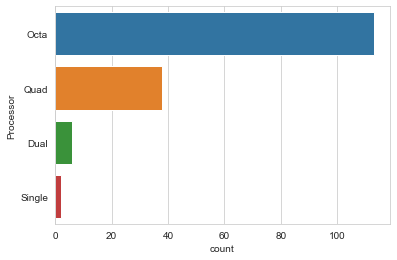

In [56]:
sns.countplot(y="Processor",data=df)
plt.show()

In [57]:
df["Rating"].replace("Currently Unavailable","0.0",inplace=True)

In [58]:
df["Rating"] = df["Rating"].astype(float) 

In [59]:
df["Price"].replace("Currently Unavailable","0",inplace=True)

In [60]:
df["Price"] = df["Price"].astype(int) 

In [61]:
df["Price"].max()

109999

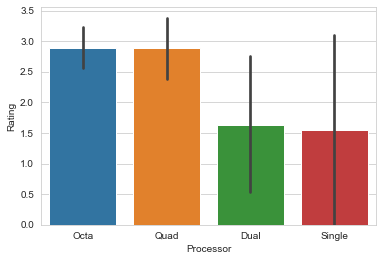

In [62]:
sns.barplot(y="Rating",x="Processor",data=df)
plt.show()

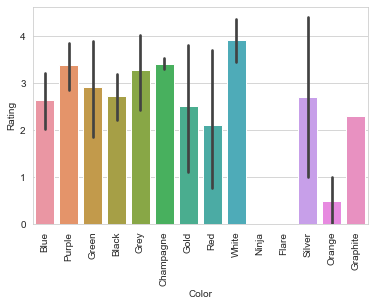

In [63]:
sns.barplot(y="Rating",x="Color",data=df)
plt.xticks(rotation=90)
plt.show()

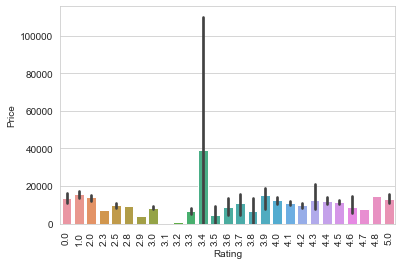

In [64]:
sns.barplot(x="Rating",y="Price",data=df)
plt.xticks(rotation=90)
plt.show()

In [65]:
df

,Prod Name,Color,Rating,Price,RAM,Screen,Rear Camera,Front Camera,Memory,Battery,Processor
0,"Redmi 9 Prime ( 64GB , 4 GB )",Blue,4.5,10799,4 GB,16.51 cm (6.5),13MP+8MP+2MP,8 MP,64GB,5020,Octa
1,"itel A25 pro ( 32GB , 2 GB )",Purple,4.0,5599,2 GB,12.7 cm (5),5 MP,2 MP,32GB,3020,Quad
2,"Redmi Note 9 ( 128GB , 4 GB )",Green,4.0,14499,4 GB,16.51 cm (6.5),48 MP,13 MP,128GB,5020,Octa
3,"Blackberry ( 16GB , 2 GB )",Black,3.4,6999,2 GB,12.7 cm (5),8 MP,2MP to 4.9MP,16GB,2800,Dual
4,"Redmi Note 9 ( 64GB , 4 GB )",Grey,4.4,13999,4 GB,16.51 cm (6.5),48MP+8MP+2MP+2MP,13 MP,64GB,5020,Octa
...,...,...,...,...,...,...,...,...,...,...,...
154,"Oppo A5 2020 ( 64GB , 4 GB )",Black,4.0,13990,4 GB,16.51 cm (6.5),12 MP,8 MP,64GB,5000,Octa
155,"Micromax Yu Yutopia 5050 ( 32GB , 4 GB )",Graphite,2.3,7099,4 GB,13.208 cm (5.2),21 MP,8 MP,32GB,3000,Octa
156,"Oppo F17 ( 128GB , 6 GB )",Blue,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015,Quad
157,"Oppo F17 ( 128GB , 6 GB )",Silver,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015,Quad


In [67]:
Prod_brand = [i.split(" ")[0] for i in df["Prod Name"]]
Prod_brand
#new column of brands created

['Redmi',
 'itel',
 'Redmi',
 'Blackberry',
 'Redmi',
 'YU',
 'Lava',
 'Samsung',
 'OPPO',
 'Redmi',
 'Lava',
 'Micromax',
 'Redmi',
 'MI',
 'TECNO',
 'Redmi',
 'Lenovo',
 'Blackberry',
 'Redmi',
 'INFINIX',
 'Redmi',
 'Samsung',
 'Xolo',
 'Lava',
 'Poco',
 'Redmi',
 'Karbonn',
 'Redmi',
 'Oppo',
 'YU',
 'Xolo',
 'Redmi',
 'Redmi',
 'Realme',
 'Realme',
 'Redmi',
 'Redmi',
 'SAM',
 'Panasonic',
 'Redmi',
 'Redmi',
 'Realme',
 'Realme',
 'itel',
 'Honor',
 'Redmi',
 'Redmi',
 'Panasonic',
 'Karbonn',
 'Redmi',
 'TECNO',
 'Realme',
 'Realme',
 'Realme',
 'Redmi',
 'YU',
 'INFINIX',
 'Redmi',
 'Samsung',
 'Realme',
 'Realme',
 'Redmi',
 'Realme',
 'Samsung',
 'Redmi',
 'REDMI',
 'INFINIX',
 'Swipe',
 'INFINIX',
 'Redmi',
 'OnePlus',
 'Redmi',
 'Redmi',
 'Samsung',
 'Redmi',
 'Poco',
 'Redmi',
 'Realme',
 'Realme',
 'Redmi',
 'Realme',
 'Redmi',
 'INFINIX',
 'Redmi',
 'Oppo',
 'Realme',
 '1',
 'Poco',
 'Redmi',
 'Redmi',
 'Redmi',
 'OnePlus',
 'itel',
 'itel',
 'Realme',
 'Poco',
 'Samsung

In [68]:
df.insert(loc=0, column='Prod Brand', value=Prod_brand)
df
#final dataset

,Prod Brand,Prod Name,Color,Rating,Price,RAM,Screen,Rear Camera,Front Camera,Memory,Battery,Processor
0,Redmi,"Redmi 9 Prime ( 64GB , 4 GB )",Blue,4.5,10799,4 GB,16.51 cm (6.5),13MP+8MP+2MP,8 MP,64GB,5020,Octa
1,itel,"itel A25 pro ( 32GB , 2 GB )",Purple,4.0,5599,2 GB,12.7 cm (5),5 MP,2 MP,32GB,3020,Quad
2,Redmi,"Redmi Note 9 ( 128GB , 4 GB )",Green,4.0,14499,4 GB,16.51 cm (6.5),48 MP,13 MP,128GB,5020,Octa
3,Blackberry,"Blackberry ( 16GB , 2 GB )",Black,3.4,6999,2 GB,12.7 cm (5),8 MP,2MP to 4.9MP,16GB,2800,Dual
4,Redmi,"Redmi Note 9 ( 64GB , 4 GB )",Grey,4.4,13999,4 GB,16.51 cm (6.5),48MP+8MP+2MP+2MP,13 MP,64GB,5020,Octa
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Oppo,"Oppo A5 2020 ( 64GB , 4 GB )",Black,4.0,13990,4 GB,16.51 cm (6.5),12 MP,8 MP,64GB,5000,Octa
155,Micromax,"Micromax Yu Yutopia 5050 ( 32GB , 4 GB )",Graphite,2.3,7099,4 GB,13.208 cm (5.2),21 MP,8 MP,32GB,3000,Octa
156,Oppo,"Oppo F17 ( 128GB , 6 GB )",Blue,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015,Quad
157,Oppo,"Oppo F17 ( 128GB , 6 GB )",Silver,1.0,16990,6 GB,16.256 cm (6.4),16MP+8MP+2MP,16 MP,128GB,4015,Quad


In [73]:
df.columns

Index(['Prod Brand', 'Prod Name', 'Color', 'Rating', 'Price', 'RAM', 'Screen',
       'Rear Camera', 'Front Camera', 'Memory', 'Battery', 'Processor'],
      dtype='object')

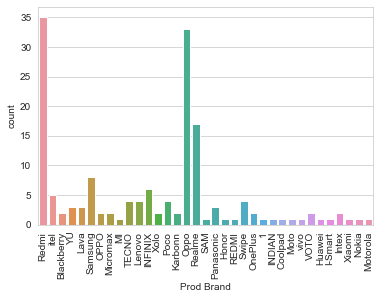

In [69]:
sns.countplot(x="Prod Brand",data=df)
plt.xticks(rotation=90)
plt.show()
#We see redmi oppo realme with most products in snapdeal. People buy more of these products.

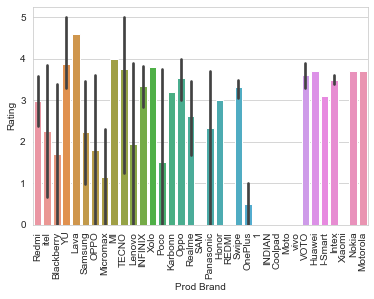

In [70]:
sns.barplot(x="Prod Brand",y="Rating",data=df)
plt.xticks(rotation=90)
plt.show()

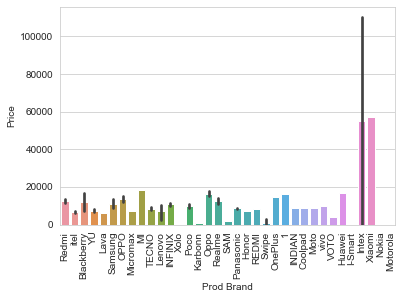

In [72]:
sns.barplot(x="Prod Brand",y="Price",data=df)
plt.xticks(rotation=90)
plt.show()
#Most phones are below 20000 range in snapdeal.

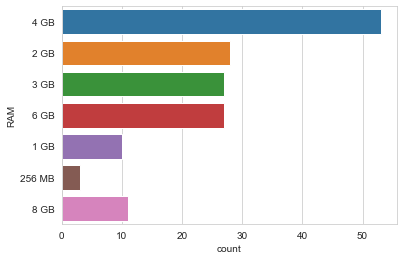

In [74]:
sns.countplot(y="RAM",data=df)
plt.show()
#Most product are of 4 GB RAM in snapdeal. People buy more products with 4 GB RAM.

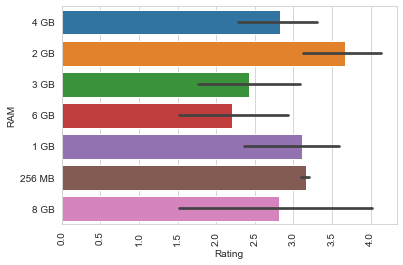

In [75]:
sns.barplot(x="Rating",y="RAM",data=df)
plt.xticks(rotation=90)
plt.show()

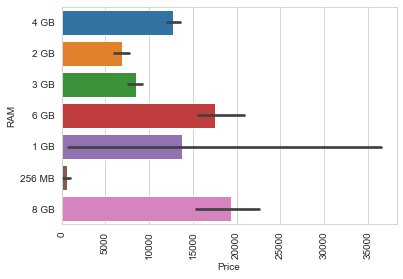

In [76]:
sns.barplot(x="Price",y="RAM",data=df)
plt.xticks(rotation=90)
plt.show()

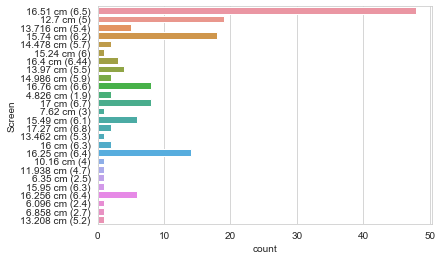

In [77]:
sns.countplot(y="Screen",data=df)
plt.show()
#Maximum phones have screen of 16.51 cm range 

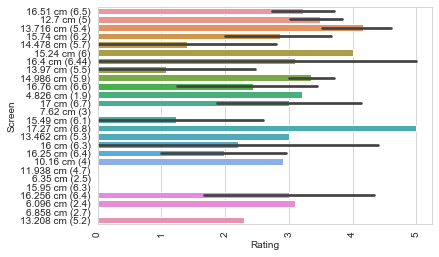

In [78]:
sns.barplot(x="Rating",y="Screen",data=df)
plt.xticks(rotation=90)
plt.show()
#In above plot we see people rated the highest for the biggest screen size available in snapdeal.

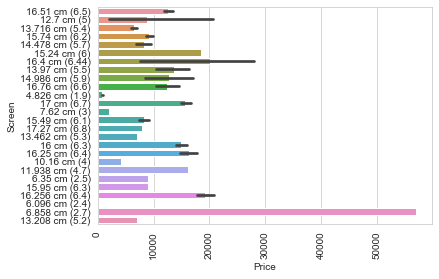

In [79]:
sns.barplot(x="Price",y="Screen",data=df)
plt.xticks(rotation=90)
plt.show()

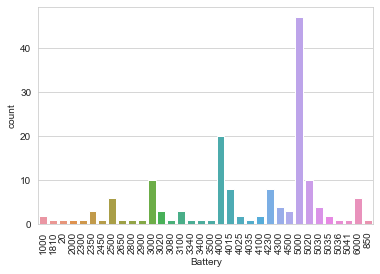

In [82]:
sns.countplot(x="Battery",data=df)
plt.xticks(rotation=90)
plt.show()
#Most phones have battery capacity of 5000mAh.

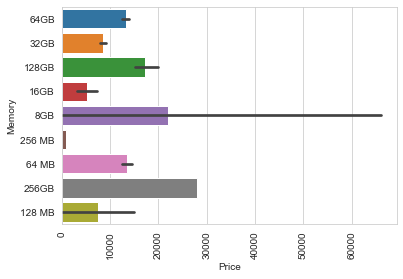

In [83]:
sns.barplot(x="Price",y="Memory",data=df)
plt.xticks(rotation=90)
plt.show()

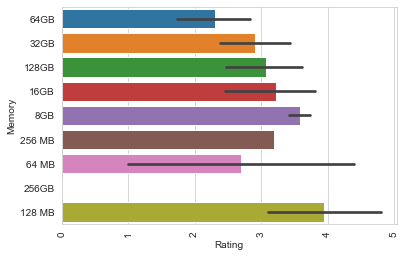

In [88]:
sns.barplot(x="Rating",y="Memory",data=df)
plt.xticks(rotation=90)
plt.show()

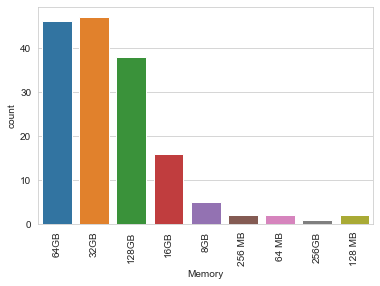

In [89]:
sns.countplot(x="Memory",data=df)
plt.xticks(rotation=90)
plt.show()
#34 & 64 GB memory phones are in better price range.

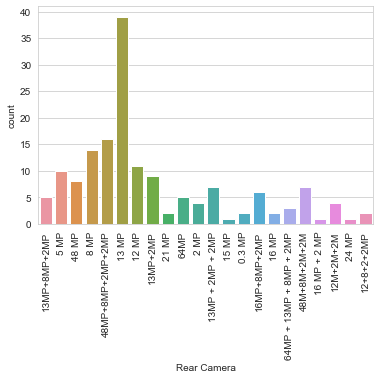

In [90]:
sns.countplot(x="Rear Camera",data=df)
plt.xticks(rotation=90)
plt.show()
#Maximum phones are of 13 MP rear camera.

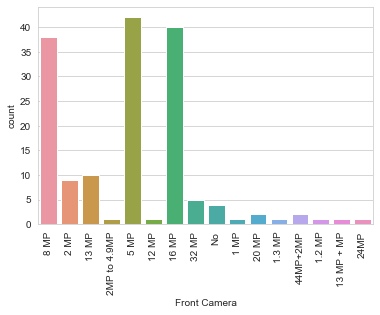

In [91]:
sns.countplot(x="Front Camera",data=df)
plt.xticks(rotation=90)
plt.show()
#Maximum phones are of  5 , 16, or 8 MP front camera.

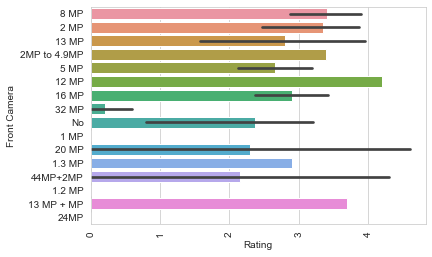

In [92]:
sns.barplot(x="Rating",y="Front Camera",data=df)
plt.xticks(rotation=90)
plt.show()

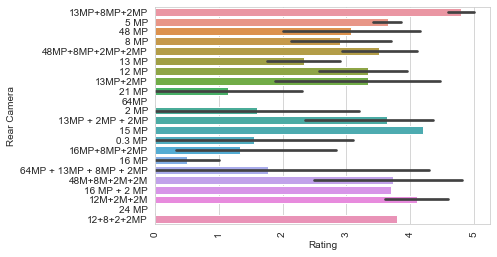

In [93]:
sns.barplot(x="Rating",y="Rear Camera",data=df)
plt.xticks(rotation=90)
plt.show()
#Phones with 13+8+2MP rear camera are highly rated.

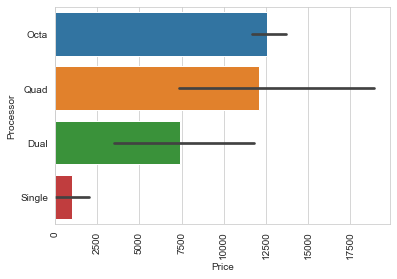

In [95]:
sns.barplot(x="Price",y="Processor",data=df)
plt.xticks(rotation=90)
plt.show()
#As the processor power increases price also increases but few phones of quad core processors are highly rated.

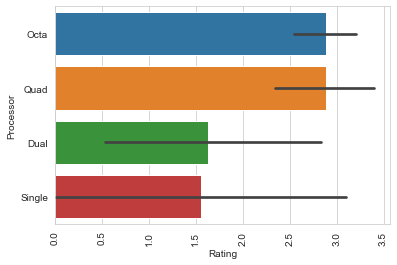

In [96]:
sns.barplot(x="Rating",y="Processor",data=df)
plt.xticks(rotation=90)
plt.show()
#Ratings are also high for higher processor phones. Few quad core processor phones  are highly rated.

***